In [1]:
from fi.client import Client

In [ ]:
from datasets import load_dataset

ds = load_dataset("osunlp/MagicBrush")

In [3]:
ds["train"][0]

{'img_id': '327726',
 'turn_index': 1,
 'source_img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x500>,
 'mask_img': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1024x1024>,
 'instruction': 'change the table for a dog',
 'target_img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>}

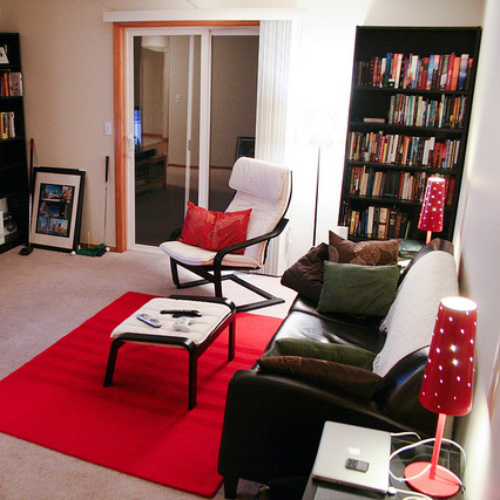

In [4]:
ds["train"][0]["source_img"]

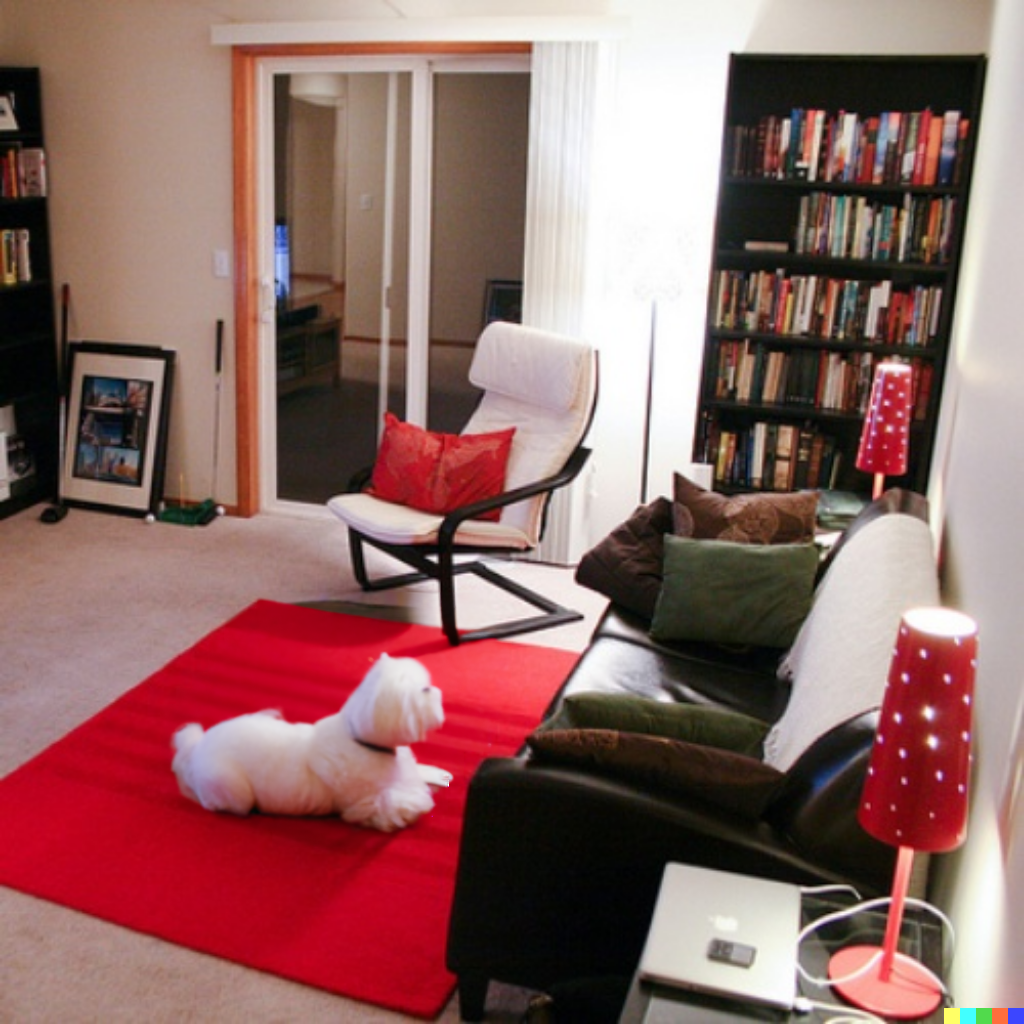

In [5]:
ds["train"][0]["target_img"]

In [6]:
fi_client = Client(
  uri="https://api.futureagi.com",
  api_key="FI_API_KEY",
  secret_key="FI_SECRET_KEY"
)

In [7]:
from fi.client import ModelTypes, Environments
import uuid
import time
from PIL import Image
import base64
from io import BytesIO

In [8]:
def to_byte_image(image):
	buffered = BytesIO()
	image.save(buffered, format="JPEG")

	# Get the byte data
	img_byte = buffered.getvalue()

	# Encode the byte data to base64
	img_base64 = base64.b64encode(img_byte).decode('utf-8')

	# Create the base64 string with the data URI scheme
	img_base64_str = f"data:image/jpeg;base64,{img_base64}"

	# Output the result
	return img_base64_str

In [18]:
fi_client.log(
  "image-llm",
  ModelTypes.GENERATIVE_IMAGE,
  Environments.PRODUCTION,
  "v1",
  int(time.time()),
  {
    "chat_history": [
		{
            "role": "user",
            "content": [
                {"type": "text", "text": ds["train"][0]["instruction"] },
                {"type": "image_url", "image_url": {"url": to_byte_image(ds["train"][0]["source_img"])}},
            ]
        },
        {
            "role": "assistant",
            "content": [
                {"type": "image_url", "image_url": {"url": to_byte_image(ds["train"][0]["target_img"])}}
            ]
        }
    ]
  }
).result()

<Response [200]>